Aim : Write a prgm to build Artificial Neural Network and test the same using data sets.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


the objective is to predict whether the patient is diabetic or not

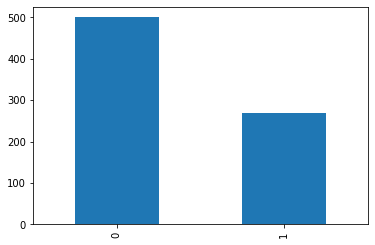

In [ ]:
import seaborn as sns
data['Outcome'].value_counts().plot(kind='bar')

In [ ]:
x=data.iloc[:,0:8]
y=data.iloc[:,8]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
762            9       89             62  ...  22.5                     0.142   33
127            1      118             58  ...  33.3                     0.261   23
564            0       91             80  ...  32.4                     0.601   27
375           12      140             82  ...  39.2                     0.528   58
663            9      145             80  ...  37.9                     0.637   40
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
192            7      159             66  ...  30.4                     0.383   36
629            4       94             65  ...  24.7                     0.148   21
559           11       85             74  ...  30.1                     0.300   35
684            5      136             82  ...   0.0                     0.640   69

[57

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


In [ ]:
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))

    # Compile the model
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mymodel.fit(x_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
58/58 [==============================] - 1s 1ms/step - loss: 6.5827 - accuracy: 0.4688
Epoch 2/150
58/58 [==============================] - 0s 1ms/step - loss: 4.3950 - accuracy: 0.4861
Epoch 3/150
58/58 [==============================] - 0s 1ms/step - loss: 3.0660 - accuracy: 0.5139
Epoch 4/150
58/58 [==============================] - 0s 1ms/step - loss: 2.2743 - accuracy: 0.5538
Epoch 5/150
58/58 [==============================] - 0s 1ms/step - loss: 1.7624 - accuracy: 0.6059
Epoch 6/150
58/58 [==============================] - 0s 1ms/step - loss: 1.5648 - accuracy: 0.6198
Epoch 7/150
58/58 [==============================] - 0s 1ms/step - loss: 1.4448 - accuracy: 0.6215
Epoch 8/150
58/58 [==============================] - 0s 1ms/step - loss: 1.3068 - accuracy: 0.6424
Epoch 9/150
58/58 [==============================] - 0s 1ms/step - loss: 1.2082 - accuracy: 0.6493
Epoch 10/150
58/58 [==============================] - 0s 1ms/step - loss: 1.1515 - accuracy: 0.6354
Epoch 11/

In [ ]:
accuracy=mymodel.evaluate(x_train,y_train)

18/18 [==============================] - 0s 1ms/step - loss: 0.4921 - accuracy: 0.7587


In [ ]:
from sklearn.metrics import accuracy_score
y_predict = np.argmax(mymodel.predict(x_test), axis=-1)
accuracy_score(y_test,y_predict)